In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy import signal
import statistics as st
from scipy import interpolate
import sys
import importlib.util
import os
df = pd.read_csv("csv/data/5/1.csv")

C:\Users\User\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from ipynb.fs.full.spatiotempral_analysis import functionswingtime,functionstancetime,accPeaks

In [3]:
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Define the path to the functions directory
functions_dir = os.path.join(current_dir, 'functions')

# Add the functions directory to sys.path
sys.path.append(functions_dir)
from PreProcessing  import PreProcessing 
# import features
from gaitEvents import gaitEvent
# import frequency

In [4]:

df.columns = ['time', 'knee_angle', 'accX_T', 'accY_T', 'accZ_T', 'gyrX_T', 'gyrY_T', 'gyrZ_T', 'accX_C', 'accY_C', 'accZ_C', 'gyrX_C', 'gyrY_C', 'gyrZ_C']

In [5]:
pre_processor = PreProcessing()
df_f = pre_processor.handleNan(df)

In [6]:
# Make 'time' start from 0
df_f['time'] = df_f['time'] - df_f['time'].iloc[0]
df_f

,time,knee_angle,accX_T,accY_T,accZ_T,gyrX_T,gyrY_T,gyrZ_T,accX_C,accY_C,accZ_C,gyrX_C,gyrY_C,gyrZ_C
0,0.00,79.77,-9.58,2.73,1.68,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
1,0.01,79.78,-9.58,2.72,1.67,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
2,0.03,79.79,-9.58,2.72,1.67,-0.04,-0.02,0.00,-0.03,0.45,10.07,0.01,0.00,0.0
3,0.04,79.80,-9.58,2.72,1.68,-0.04,-0.02,0.00,-0.04,0.45,10.06,0.01,0.00,0.0
4,0.06,79.80,-9.59,2.72,1.68,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,18.32,83.82,-9.89,1.00,1.80,-0.04,-0.03,-0.01,0.71,0.25,10.06,0.01,-0.01,0.0
1333,18.34,83.81,-9.91,1.00,1.81,-0.04,-0.03,-0.01,0.71,0.25,10.06,0.01,-0.01,0.0
1334,18.35,83.80,-9.91,1.00,1.81,-0.04,-0.03,0.00,0.72,0.25,10.06,0.01,0.00,0.0
1335,18.36,83.80,-9.91,0.99,1.81,-0.04,-0.03,0.00,0.72,0.25,10.06,0.01,0.00,0.0


In [7]:
negative_count = (df_f['knee_angle'] < 0).sum()
if(negative_count> 200):
    df_f.iloc[:, 1:] = df_f.iloc[:, 1:] * -1
df_f

,time,knee_angle,accX_T,accY_T,accZ_T,gyrX_T,gyrY_T,gyrZ_T,accX_C,accY_C,accZ_C,gyrX_C,gyrY_C,gyrZ_C
0,0.00,79.77,-9.58,2.73,1.68,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
1,0.01,79.78,-9.58,2.72,1.67,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
2,0.03,79.79,-9.58,2.72,1.67,-0.04,-0.02,0.00,-0.03,0.45,10.07,0.01,0.00,0.0
3,0.04,79.80,-9.58,2.72,1.68,-0.04,-0.02,0.00,-0.04,0.45,10.06,0.01,0.00,0.0
4,0.06,79.80,-9.59,2.72,1.68,-0.04,-0.02,0.00,-0.04,0.46,10.07,0.01,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,18.32,83.82,-9.89,1.00,1.80,-0.04,-0.03,-0.01,0.71,0.25,10.06,0.01,-0.01,0.0
1333,18.34,83.81,-9.91,1.00,1.81,-0.04,-0.03,-0.01,0.71,0.25,10.06,0.01,-0.01,0.0
1334,18.35,83.80,-9.91,1.00,1.81,-0.04,-0.03,0.00,0.72,0.25,10.06,0.01,0.00,0.0
1335,18.36,83.80,-9.91,0.99,1.81,-0.04,-0.03,0.00,0.72,0.25,10.06,0.01,0.00,0.0


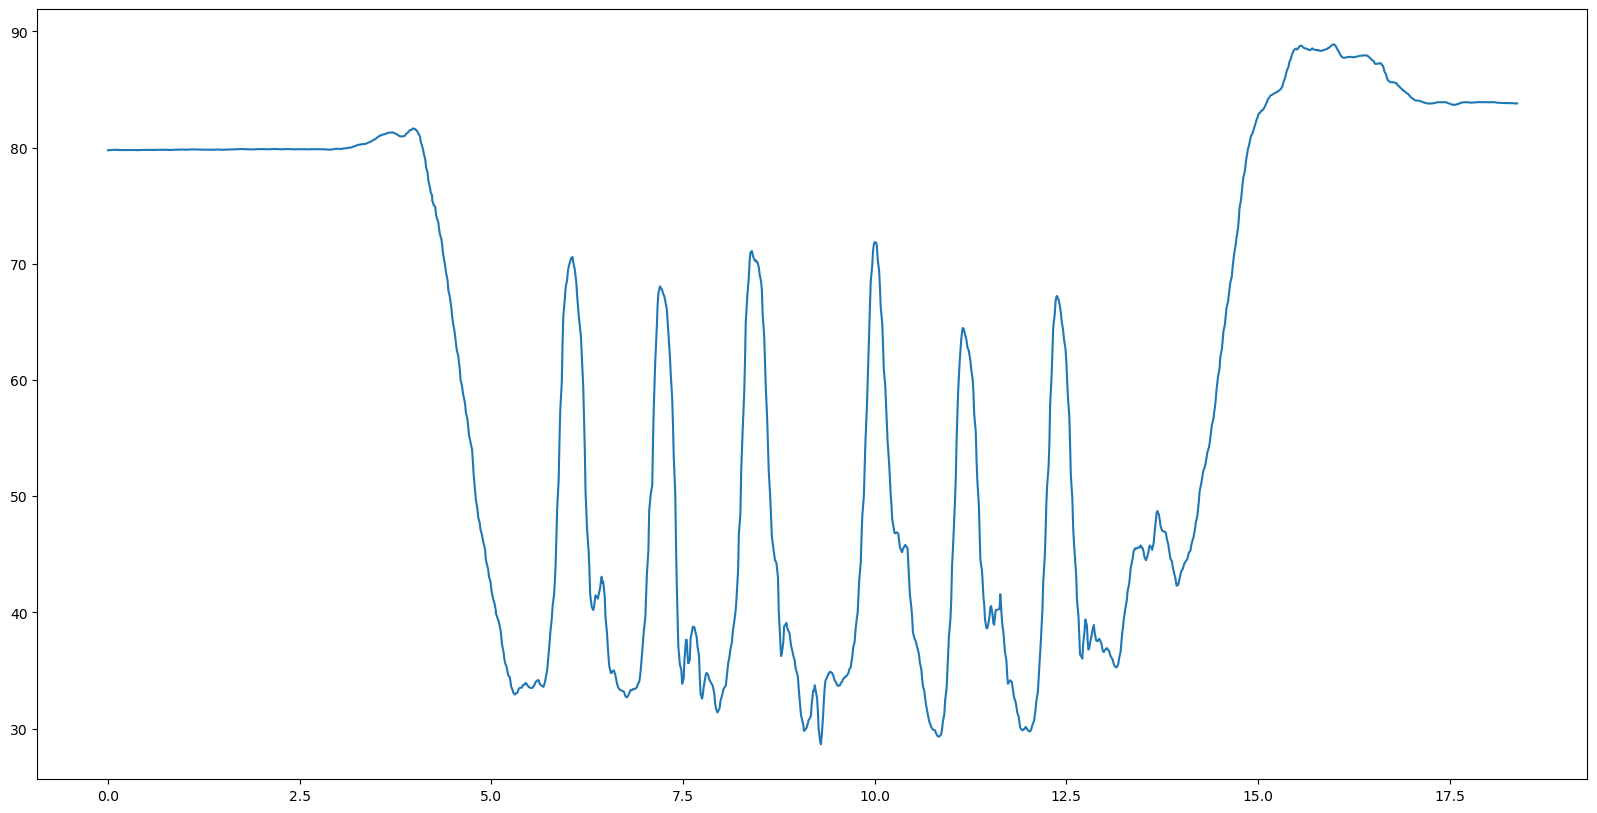

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df_f['time'],df_f['knee_angle'])
plt.show()

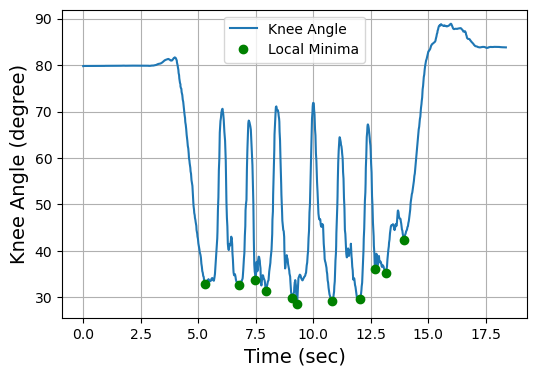

In [9]:

peaks_min, _ =find_peaks(-df_f['knee_angle'], prominence=3)  # Find local minima
# Plotting
plt.figure(figsize=(6, 4))
plt.plot(df_f['time'], df_f['knee_angle'], label='Knee Angle')
# plt.plot(df['time'].iloc[peaks_max], df['knee_angle'].iloc[peaks_max], 'ro', label='Local Maxima')
plt.plot(df_f['time'].iloc[peaks_min], df_f['knee_angle'].iloc[peaks_min], 'go', label='Local Minima')

# Add labels and title
plt.xlabel('Time (sec)',fontsize=14 )
plt.ylabel('Knee Angle (degree)',fontsize=14)
# plt.title('Local Minima of Knee Angle over Time',fontsize=16, fontweight='bold')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()




In [10]:
# Get data between first peak minimum and last peak minimum
if len(peaks_min) >= 2:
    if((df["knee_angle"][ peaks_min[-1]])>50):
        last_peak_min_index = peaks_min[-2]
    elif(df["knee_angle"][ peaks_min[0]]>50):
        first_peak_min_index = peaks_min[1]
    else:
        first_peak_min_index = peaks_min[0]
        last_peak_min_index = peaks_min[-1]
# Ensure first_peak_min_index is before last_peak_min_index
if first_peak_min_index > last_peak_min_index:
    first_peak_min_index, last_peak_min_index = last_peak_min_index, first_peak_min_index

df1 = df.iloc[first_peak_min_index:last_peak_min_index + 1]

In [11]:
df_moving = df_f.iloc[first_peak_min_index:last_peak_min_index + 1]
df_moving = df_moving.reset_index(drop=True)
df_moving["time"] = pd.to_numeric(df_moving["time"], errors = 'coerce')

In [12]:
pre_processor = PreProcessing()
idxHS = np.asarray([], dtype=int)
idxTO = np.asarray([], dtype=int)
fcgyr = 12  # Cut-off frequency of the filter for gyroscope data
fcacc = 17 # Cut-off frequency of the filter for accelerometer data
sample_frequency=100
N = 2 # Order of the butterworth filter
hs_angles=[]
to_angles=[]
try:
    fGYRyR =pre_processor.Filter(fcgyr, sample_frequency, df_moving["gyrY_C"], 'lowpass', N)
    fcaccR = pre_processor.Filter(fcacc, sample_frequency, df_moving["accZ_C"], 'lowpass', N)
    faccYC =pre_processor.Filter(fcacc,sample_frequency,df_moving["accY_C"],'lowpass',N)
    faccYT = pre_processor.Filter(fcacc,sample_frequency,df_moving["accY_T"],'lowpass',N)
except Exception as e:
    print("Filtering Error:", e)

In [13]:
idxOnsMSw =gaitEvent.MidStance(fGYRyR,0.2,0.2,100)

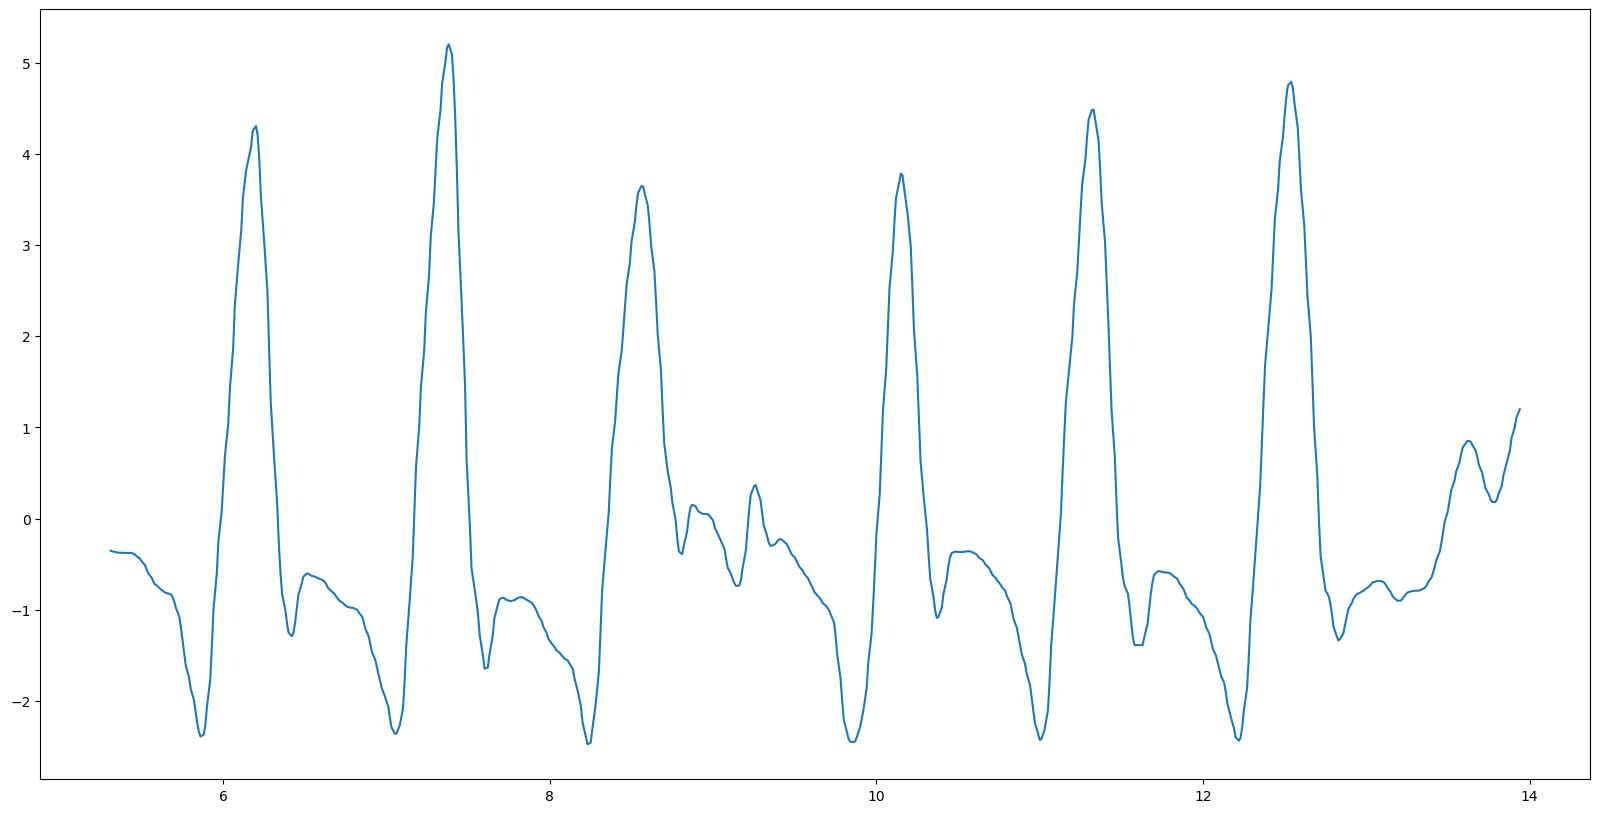

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df_moving['time'],fGYRyR)
plt.show()

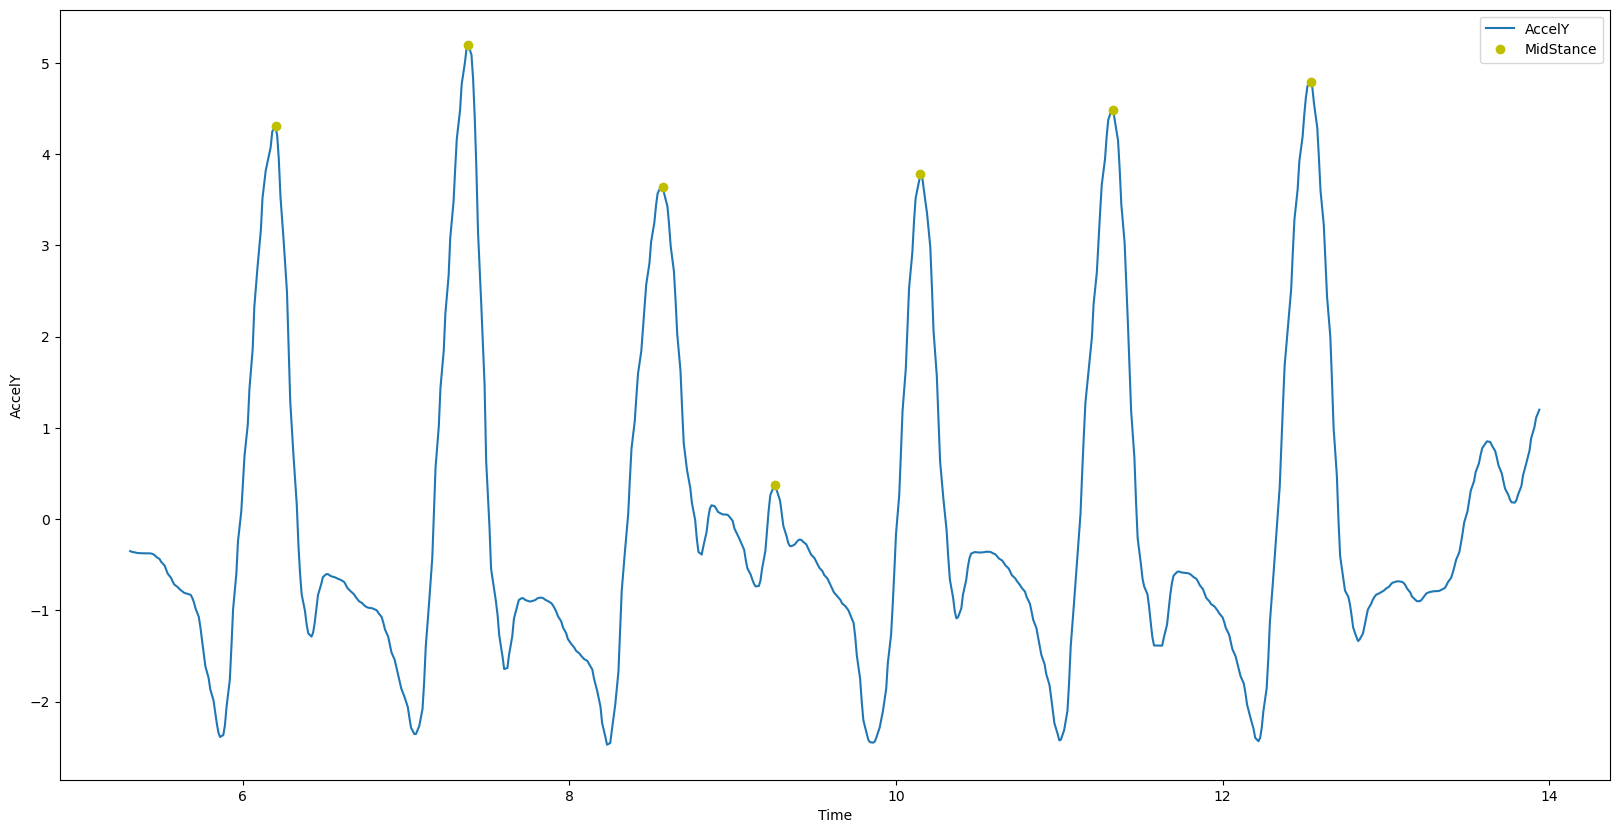

In [15]:
# Display the plot
plt.figure(figsize=(20,10))
plt.plot(df_moving['time'],fGYRyR, label='AccelY')
plt.plot(df_moving['time'].iloc[idxOnsMSw],fGYRyR[idxOnsMSw], 'yo', label='MidStance')

plt.xlabel('Time')
plt.ylabel('AccelY')
plt.legend()
plt.show()

In [16]:
idxHS =gaitEvent.heelStrike(idxOnsMSw ,fGYRyR)
idxTO =gaitEvent.toeOff(idxOnsMSw,fcaccR,fGYRyR,100)

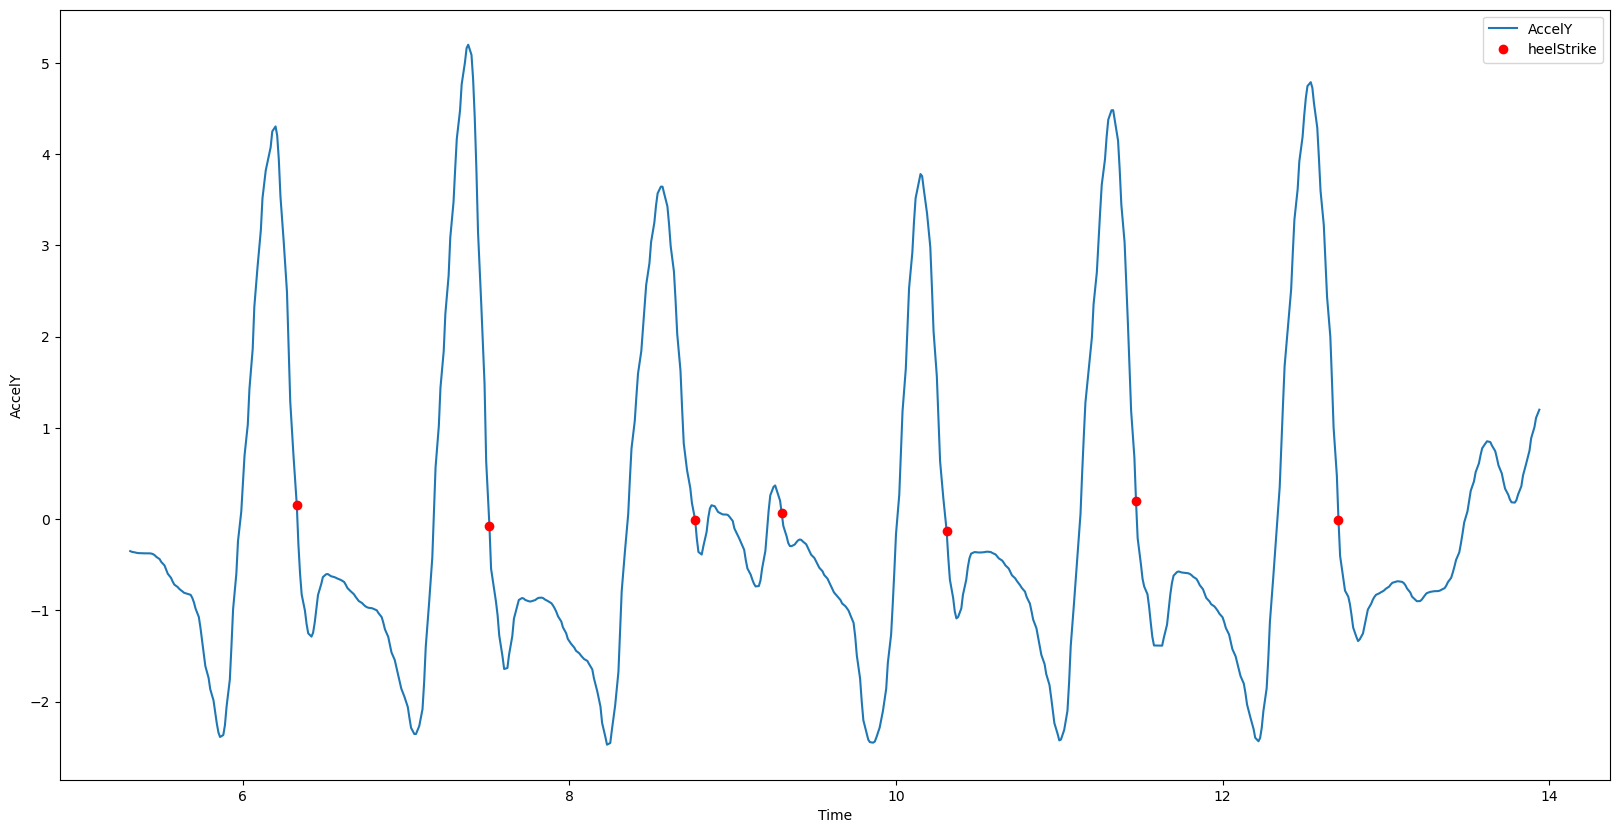

In [17]:
# Display the plot
plt.figure(figsize=(20,10))
plt.plot(df_moving['time'],fGYRyR, label='AccelY')
plt.plot(df_moving['time'].iloc[idxHS],fGYRyR[idxHS], 'ro', label='heelStrike')

plt.xlabel('Time')
plt.ylabel('AccelY')
plt.legend()
plt.show()

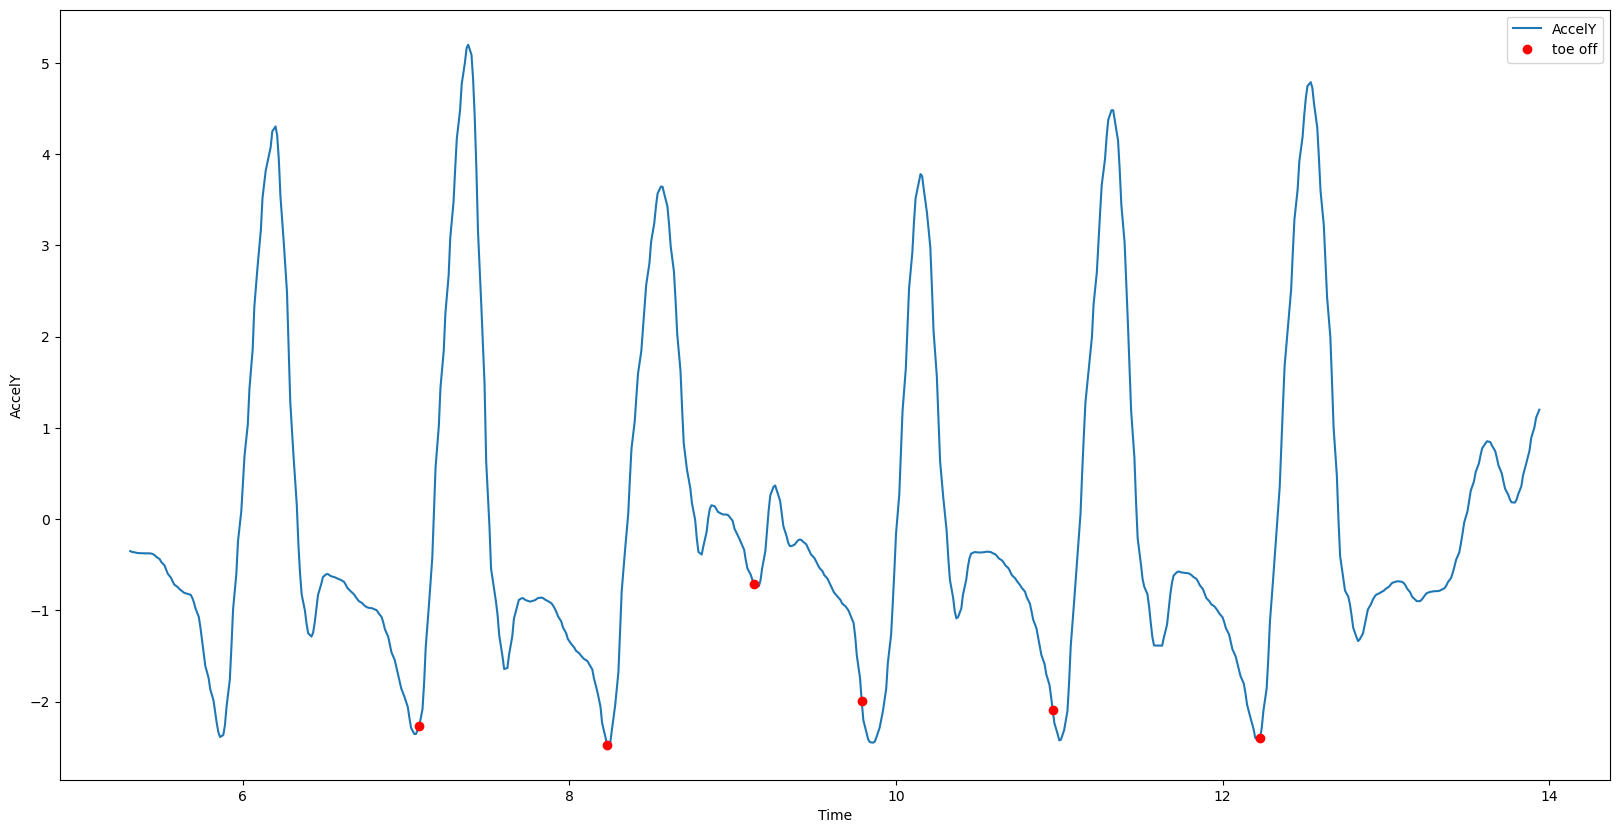

In [18]:
# Display the plot
plt.figure(figsize=(20,10))
plt.plot(df_moving['time'],fGYRyR, label='AccelY')
plt.plot(df_moving['time'].iloc[idxTO],fGYRyR[idxTO], 'ro', label='toe off')

plt.xlabel('Time')
plt.ylabel('AccelY')
plt.legend()
plt.show()

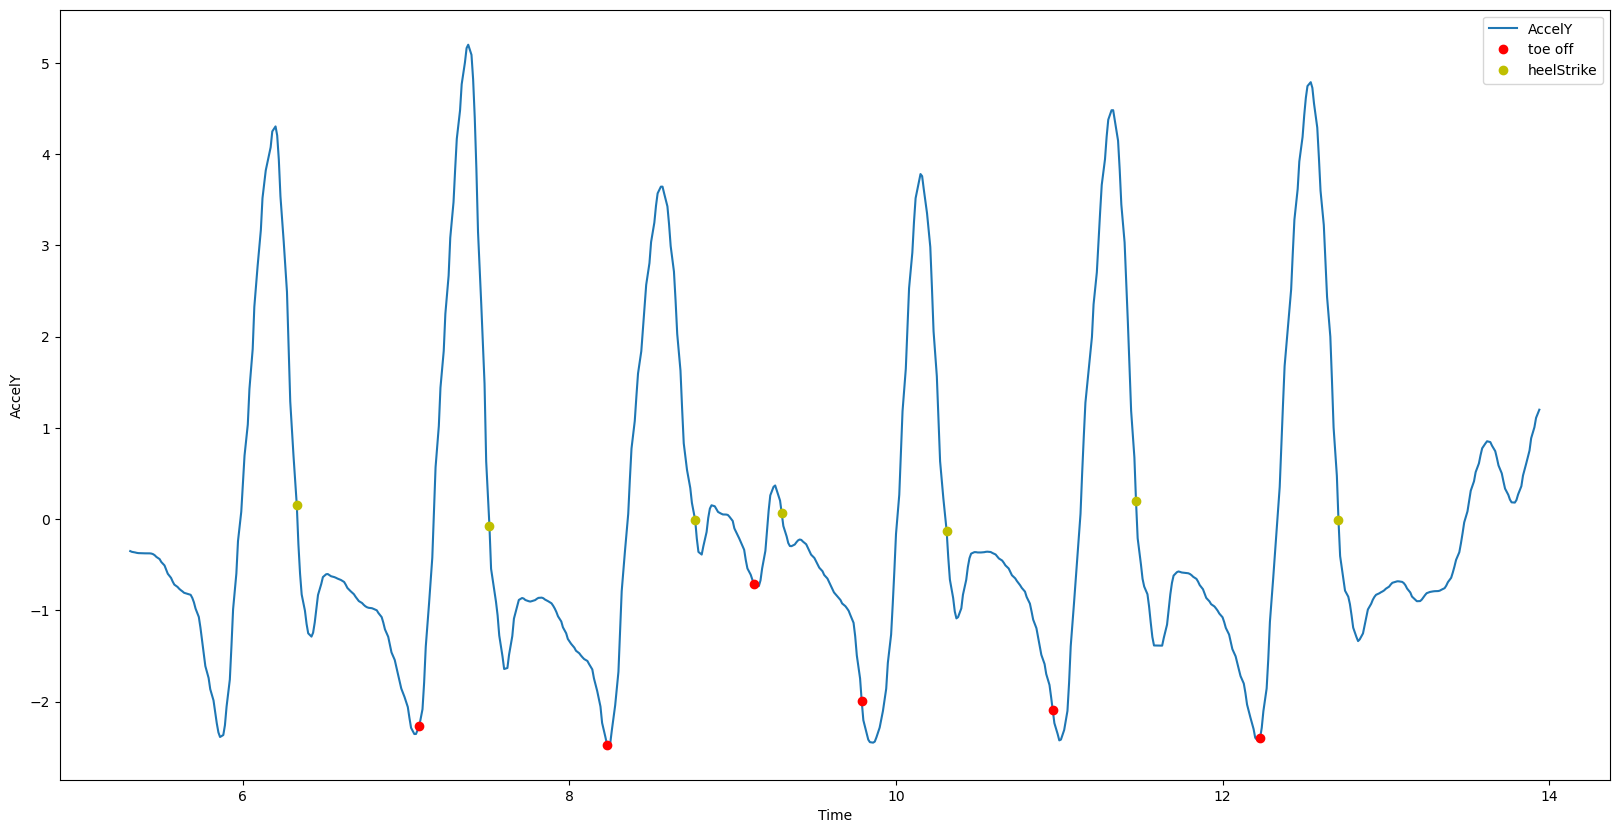

In [19]:
# Display the plot
plt.figure(figsize=(20,10))
plt.plot(df_moving['time'],fGYRyR, label='AccelY')
plt.plot(df_moving['time'].iloc[idxTO],fGYRyR[idxTO], 'ro', label='toe off')
plt.plot(df_moving['time'].iloc[idxHS],fGYRyR[idxHS], 'yo', label='heelStrike')
plt.xlabel('Time')
plt.ylabel('AccelY')
plt.legend()
plt.show()

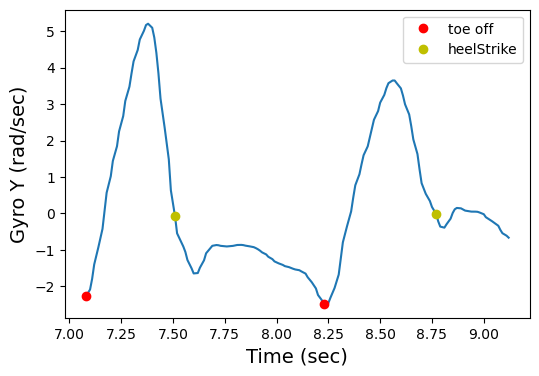

In [20]:
# Display the plot
plt.figure(figsize=(6,4))
plt.plot(df_moving['time'].iloc[idxTO[0]:idxTO[2]],fGYRyR[idxTO[0]:idxTO[2]], )
plt.plot(df_moving['time'].iloc[idxTO[0:2]],fGYRyR[idxTO[0:2]], 'ro', label='toe off')
plt.plot(df_moving['time'].iloc[idxHS[1:3]],fGYRyR[idxHS[1:3]], 'yo', label='heelStrike')

plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Gyro Y (rad/sec)', fontsize=14)
plt.legend()
plt.show()

In [21]:
 swingTO, swingHS = functionswingtime(idxTO, idxHS,100, df["time"])

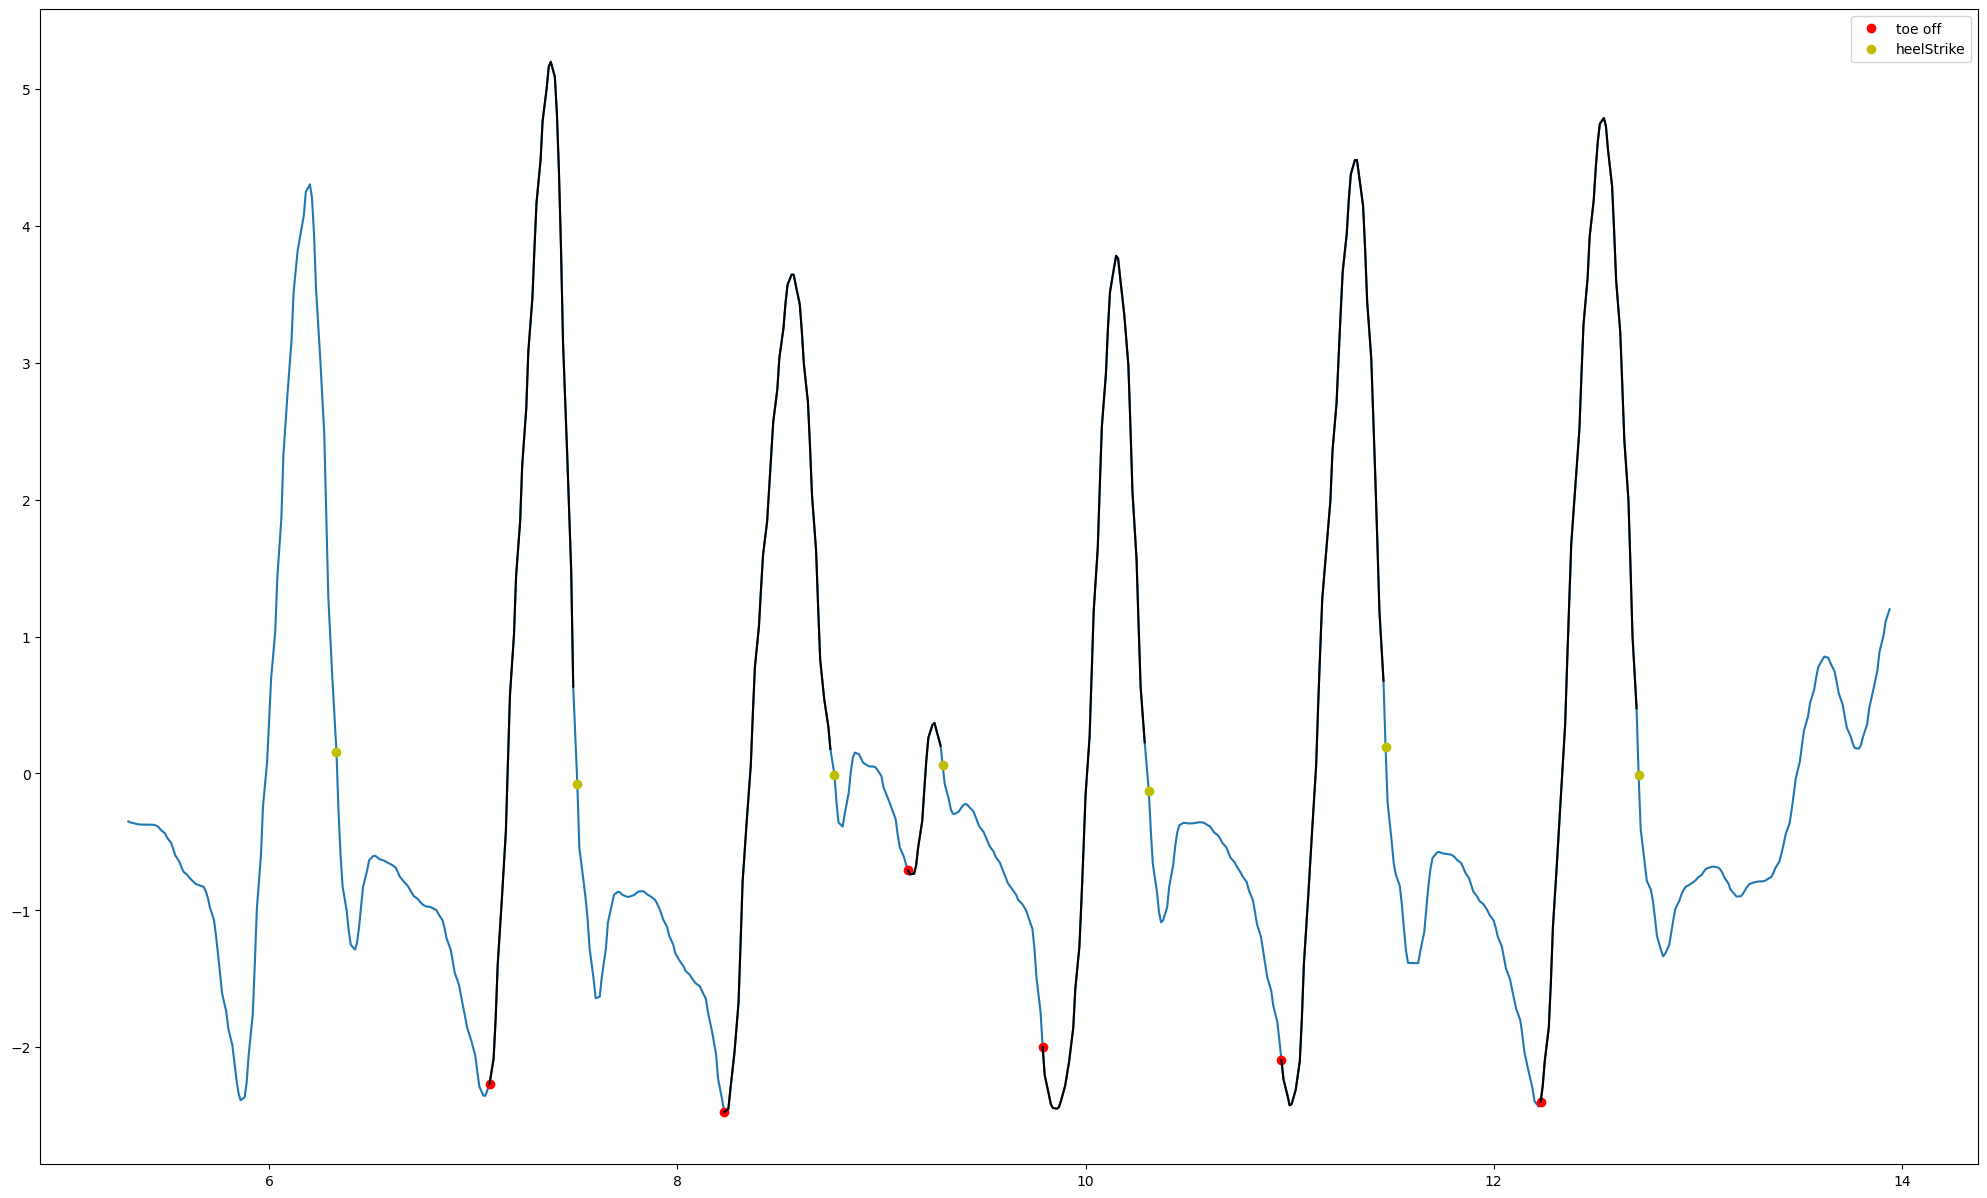

In [22]:
plt.figure(figsize=(25,15))
plt.plot(df_moving["time"] , fGYRyR)
plt.plot(df_moving['time'].iloc[idxTO],fGYRyR[idxTO], 'ro', label='toe off')
plt.plot(df_moving['time'].iloc[idxHS],fGYRyR[idxHS], 'yo', label='heelStrike')

# Connect red dots with yellow dots
for to_idx, hs_idx in zip(swingTO, swingHS):
    to_idx = int(to_idx)
    hs_idx = int(hs_idx)
    plt.plot(df_moving["time"][to_idx:hs_idx], fGYRyR[to_idx:hs_idx], 'k-')

plt.legend()
plt.show()

In [23]:
 stanceTO, stanceHS = functionstancetime(idxTO, idxHS, 100,np.array( df1["time"]))

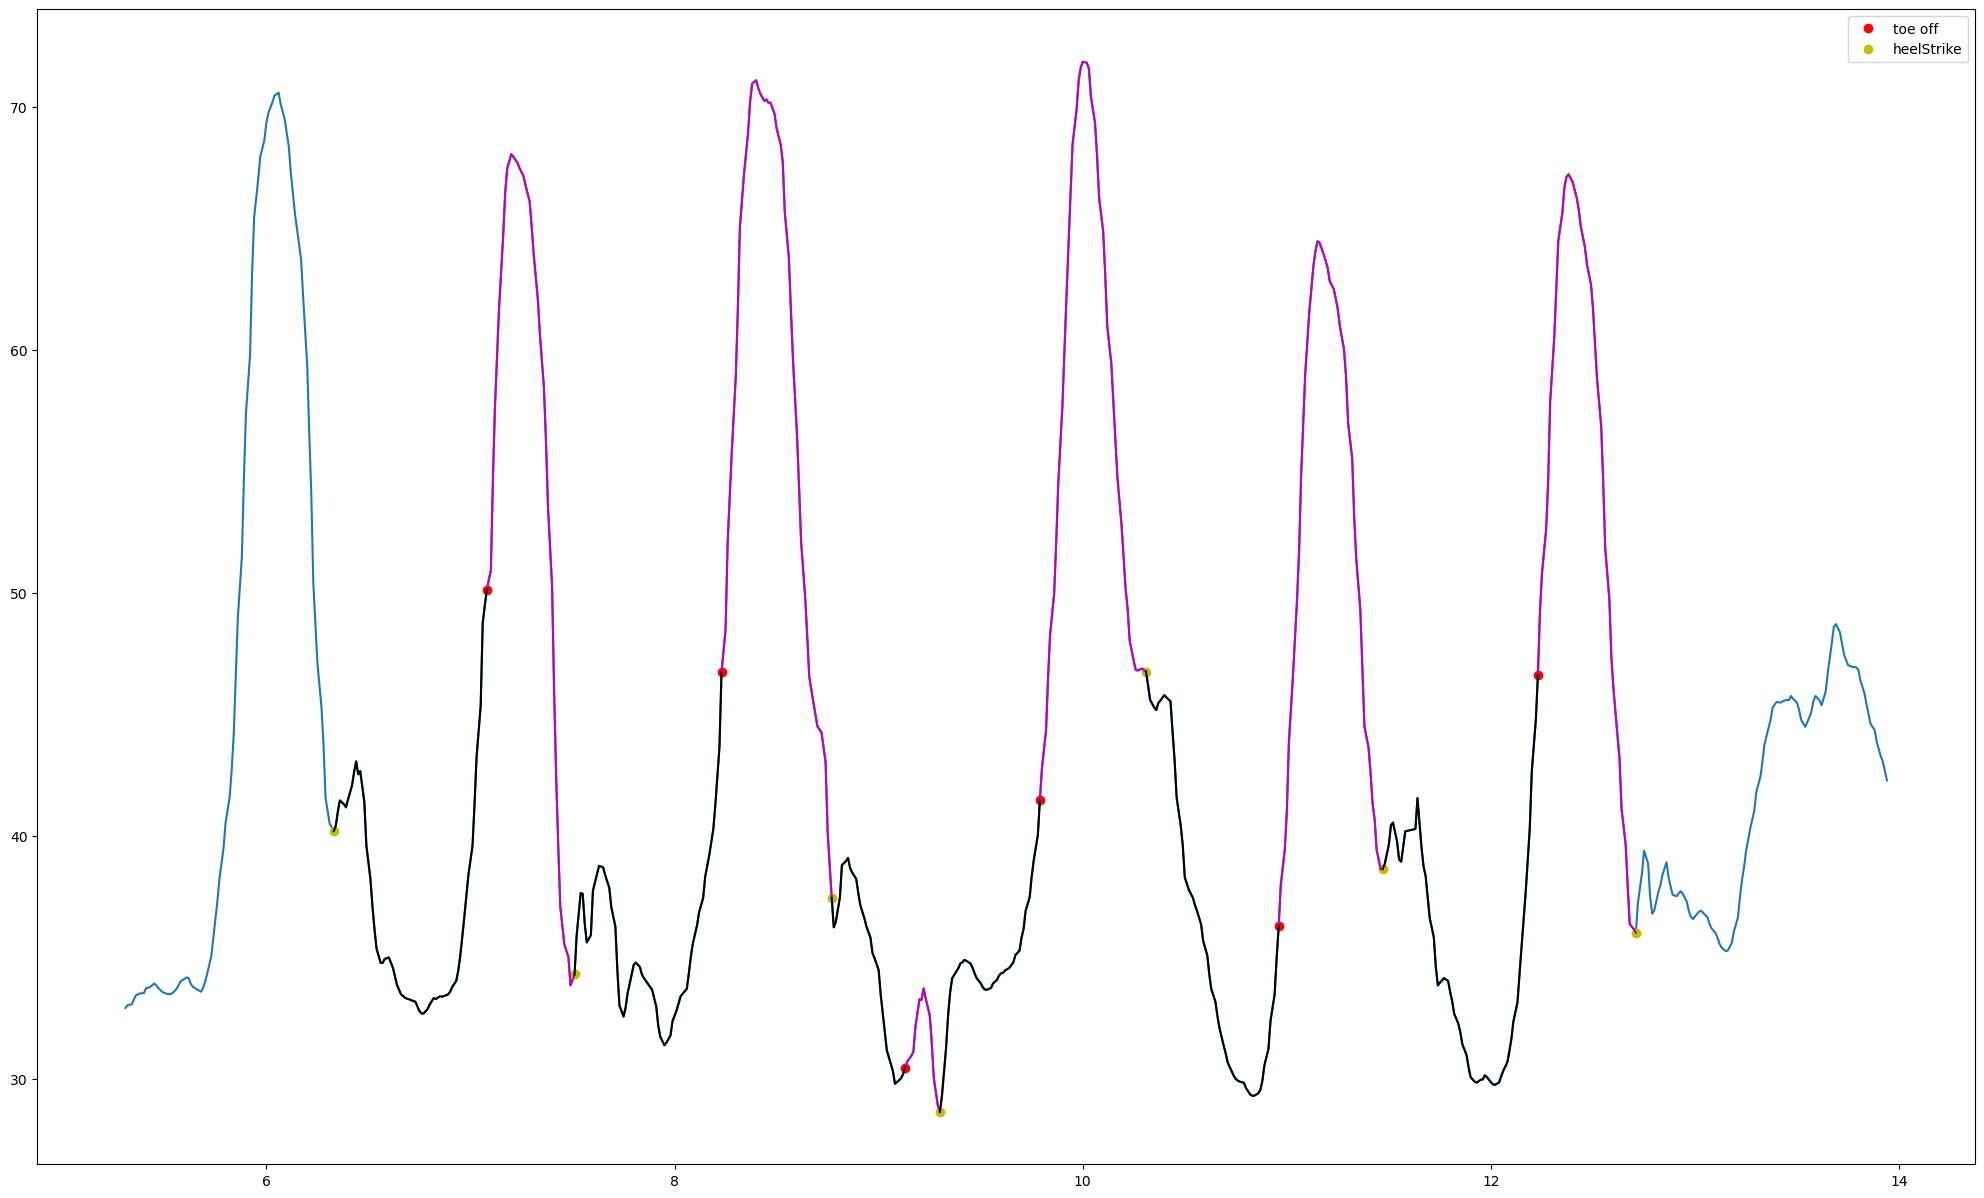

In [24]:
plt.figure(figsize=(25,15))
plt.plot(df_moving["time"] ,df_moving["knee_angle"])
plt.plot(df_moving['time'].iloc[idxTO],df_moving["knee_angle"].iloc[idxTO], 'ro', label='toe off')
plt.plot(df_moving['time'].iloc[idxHS],df_moving["knee_angle"].iloc[idxHS], 'yo', label='heelStrike')

# Connect red dots with yellow dots
for to_idx, hs_idx in zip(swingTO, swingHS):
    to_idx = int(to_idx)
    hs_idx = int(hs_idx)
    plt.plot(df_moving["time"][to_idx:hs_idx+1], df_moving["knee_angle"].iloc[to_idx:hs_idx+1], 'm-')
# # Connect red dots with yellow dots
for hs_idx, to_idx in zip(stanceHS, stanceTO):
    to_idx = int(to_idx)
    hs_idx = int(hs_idx)
    plt.plot(df_moving["time"][hs_idx: to_idx+1], df_moving["knee_angle"].iloc[hs_idx:to_idx+1], 'k-')

plt.legend()
plt.show()

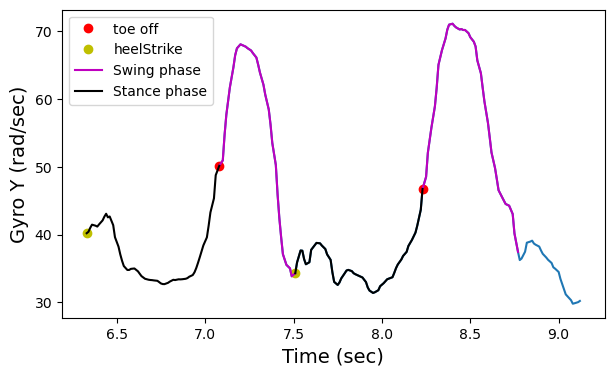

In [25]:
plt.figure(figsize=(7,4))
plt.plot(df_moving["time"][idxTO[0]:idxTO[2]] ,df_moving["knee_angle"][idxTO[0]:idxTO[2]])
plt.plot(df_moving['time'].iloc[idxTO[0:2]],df_moving["knee_angle"].iloc[idxTO[0:2]], 'ro', label='toe off')
plt.plot(df_moving['time'].iloc[idxHS[0:2]],df_moving["knee_angle"].iloc[idxHS[0:2]], 'yo', label='heelStrike')
label_added = False
label_added1 = False
# Connect red dots with yellow dots
for to_idx, hs_idx in zip(swingTO[0:2], swingHS[0:2]):
    to_idx = int(to_idx)
    hs_idx = int(hs_idx)
    if not label_added:
        plt.plot(df_moving["time"][to_idx:hs_idx+1], df_moving["knee_angle"].iloc[to_idx:hs_idx+1], 'm-', label='Swing phase')
        label_added = True
    else:
        plt.plot(df_moving["time"][to_idx:hs_idx+1], df_moving["knee_angle"].iloc[to_idx:hs_idx+1], 'm-')

# # Connect red dots with yellow dots
for hs_idx, to_idx in zip(stanceHS[0:2], stanceTO[0:2]):
    to_idx = int(to_idx)
    hs_idx = int(hs_idx)
    if not label_added1:
        plt.plot(df_moving["time"][hs_idx: to_idx+1], df_moving["knee_angle"].iloc[hs_idx:to_idx+1], 'k-')
        label_added1 = True
    else:
         plt.plot(df_moving["time"][hs_idx: to_idx+1], df_moving["knee_angle"].iloc[hs_idx:to_idx+1], 'k-',label='Stance phase')

plt.xlabel('Time (sec)', fontsize=14)
plt.ylabel('Gyro Y (rad/sec)', fontsize=14)
plt.legend()
plt.show()

# Thrust acceleration

In [26]:

lowerPeaksTCalf, lowerPeaksClaf,  higherPeaksTCalf,higherPeaksClaf=accPeaks( faccYC,df1['time'],idxHS)
lowerPeaksTThigh, lowerPeaksThigh,  higherPeaksTThigh,higherPeaksThigh=accPeaks( faccYT,df1['time'],idxHS)

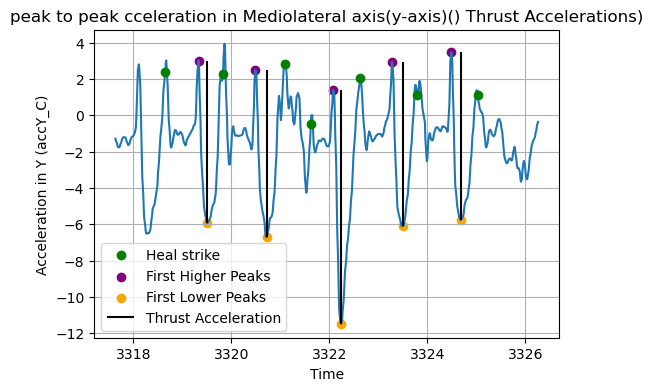

In [29]:
# Plot the entire signal with all detected peaks
plt.figure(figsize=(6, 4))
plt.plot(df1['time'], faccYC, )
plt.plot(df1['time'].iloc[idxHS], faccYC[idxHS], 'go', label='Heal strike')

# Plot the first higher and lower peaks between heel strikes
plt.scatter(higherPeaksTCalf,higherPeaksClaf, color='purple', label='First Higher Peaks')
plt.scatter(lowerPeaksTCalf, lowerPeaksClaf, color='orange', label='First Lower Peaks')
# Plot thrust accelerations

for i in range(len(higherPeaksClaf)):
    plt.vlines(x=lowerPeaksTCalf[i], ymin=lowerPeaksClaf[i], ymax=higherPeaksClaf[i], color='black', label='Thrust Acceleration' if i == 0 else "", zorder=4)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Acceleration in Y (accY_C)')
plt.title('peak to peak cceleration in Mediolateral axis(y-axis)() Thrust Accelerations)')
plt.legend()
plt.grid(True)
plt.show()

